<a href="https://colab.research.google.com/github/SUPScientist/Advanced-Quantitative-Oceanography/blob/main/notebooks/loveGroveBridge_transect_20250417-OCN390.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smith and Burnt Mill Creeks Salinity Sections
Goal: produce section plots using profiles from across a creek, river, or other section/transect.

## Open in Colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SUPScientist/Advanced-Quantitative-Oceanography/blob/main/notebooks/loveGroveBridge_transect_20250417-OCN390.ipynb)

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
# import cmocean as cm

from scipy.interpolate import griddata

# Find data in correct folder, see test file
## How to navigate to data
### Option 1:
Run this notebook via Jupyter lab operating on your personal machine (e.g., laptop). Download Jupyter via Anaconda. Install any libraries indicated above that are not automatically downloaded (which will therefore throw errors when running the cell above). These can also be installed via Anaconda.

See https://github.com/COAST-Lab/Tidal-Creek-Analysis/blob/main/loveGroveBridge_transect_20250417.ipynb for example using Option 1.

### Option 2:
Run this notebook via Google Colab. This is what I will do below.


In [14]:
# First navigate to data
# Option 1 (running in Jupyter lab as described above)
# comment out (put hashtags in front) if using option 2
# uncomment (remove hashtags) if using option 1
# folderpath = os.path.join('Data', 'Love Grove Bridge CastAway OCN 390')
# filepath = os.path.join(folderpath, 'all casts lgb 31.3.25 (upcasts only).csv')
# filepath

# Option 2 (running in Google Colab)
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Option 2 (continued):
Now you will see your Google Drive files in the left pane (file explorer). Right click on the file that you need to import and select copy path. Then import as usual in pandas, using this copied path. (Of course your file needs to be uploaded to Google Drive first.)

In [20]:
# Option 2 (continued)
df_full = pd.read_csv('/content/all casts lgb 31.3.25 (upcasts only).csv')
df_full.head()

,cast #,Depth (m),Salinity (PSU)
0,1,0.578006,1.086670
1,1,0.153280,1.088502
2,2,1.190352,1.058055
3,2,0.766406,1.052438
4,2,0.459848,1.047793


FileNotFoundError: [Errno 2] No such file or directory: 'Figs-and-Animations/LGB_Profiles.png'

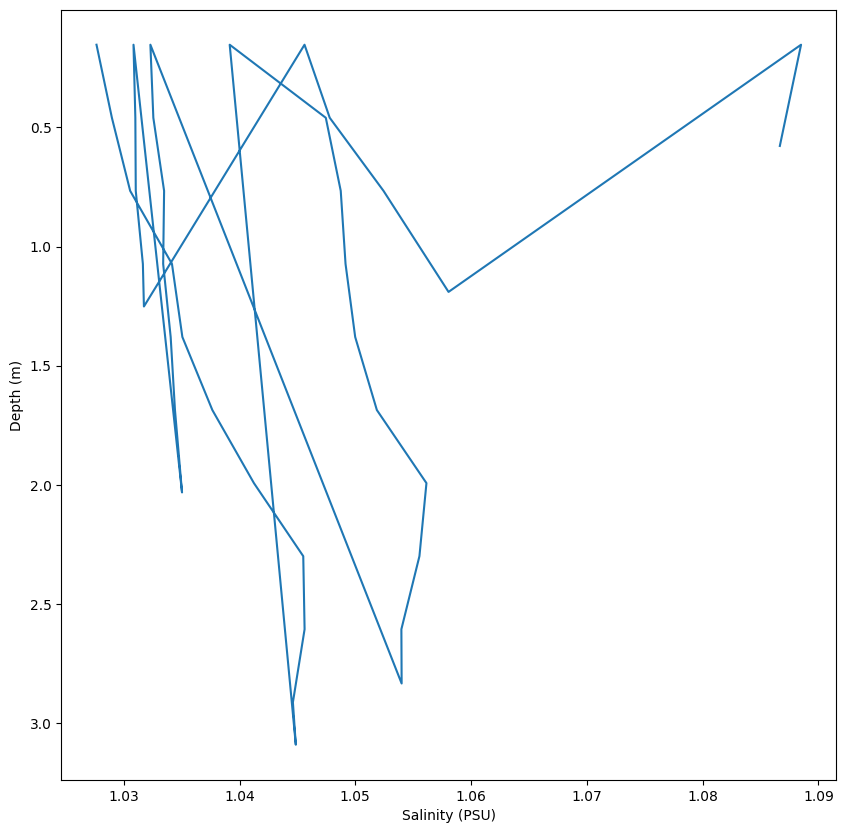

In [21]:
# Plot casts
fig, axs = plt.subplots(figsize = (10, 10))

axs.plot(df_full['Salinity (PSU)'], df_full['Depth (m)'])

axs.set_ylabel('Depth (m)')
axs.set_xlabel('Salinity (PSU)')
plt.gca().invert_yaxis() # Flip the y-axis

figname = os.path.join('Figs-and-Animations', "LGB_Profiles.png")
plt.savefig(figname, dpi = 300, transparent = True)

In [22]:
n_grid = 100

salinity = df_full['Salinity (PSU)']
distance = df_full['cast #']
depth = df_full['Depth (m)']

plotVar = salinity

dist_vec_unique = np.linspace(np.min(distance), np.max(distance), n_grid) # just for gridding
depth_vec_unique = np.linspace(np.min(depth), np.max(depth), n_grid) # just for gridding

dist_grid, depth_grid = np.meshgrid(dist_vec_unique, depth_vec_unique)
plotVar_grid = griddata((distance, depth), plotVar, (dist_grid, depth_grid), method = 'linear')

FileNotFoundError: [Errno 2] No such file or directory: 'Figs-and-Animations/LGB_transect.png'

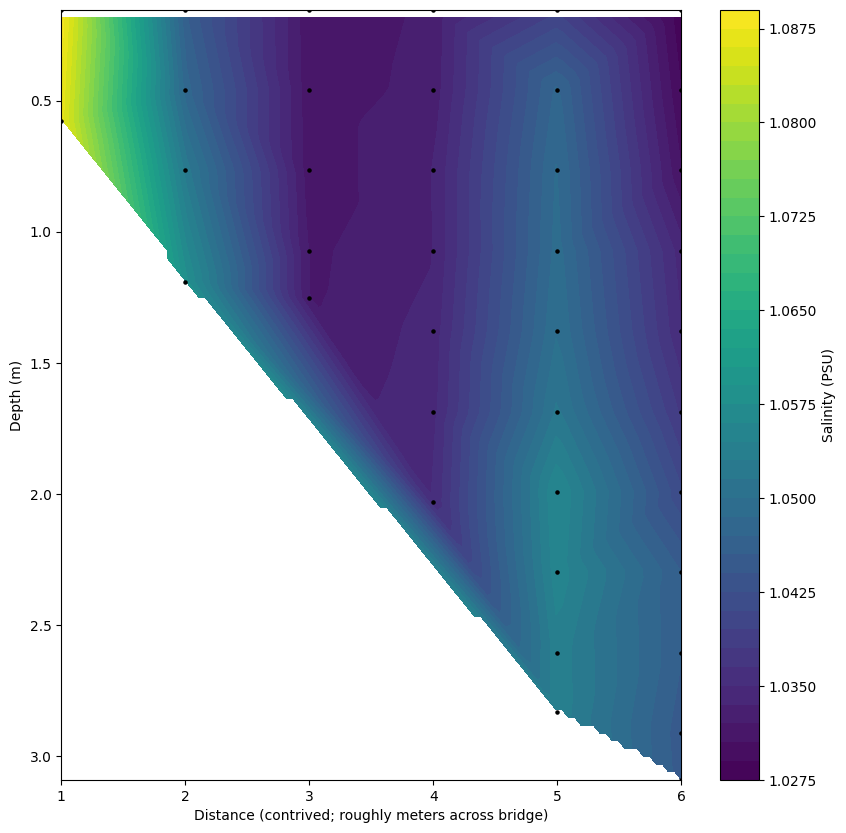

In [23]:
fig, axs = plt.subplots(figsize = (10, 10))
# my_cmap = cm.cm.haline # use cmocean colormaps if installed; select for relevant parameter
im = plt.contourf(dist_grid, depth_grid, plotVar_grid, levels = 40)#, cmap = my_cmap)#, levels = cvec, cmap=myCM, extend="both"))

sc = plt.scatter(distance, depth, c = 'black', s = 5, alpha = 1)
#                cmap=myCM, alpha = 1, vmin=vmn, vmax=vmx)

axs.set_ylabel('Depth (m)')
axs.set_xlabel('Distance (contrived; roughly meters across bridge)')
plt.gca().invert_yaxis() # Flip the y-axis
# plt.gca().invert_xaxis() # Flip the x-axis for now, since Cape Fear River is W edge

cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Salinity (PSU)')

# figname = os.path.join('Figs-and-Animations', "LGB_transect.png")
# plt.savefig(figname, dpi = 300, transparent = True)